# **Traffic Sign Classification - PAI Terminal Project**

**Group Members:**

              Zainab Rizwan (SP22-BAI-054)
              Zarnish Jawad (SP22-BAI-055)
              Farah Arooj (SP22-BAI-011)

        

# **Importing the Data**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

dataset_folder = '/content/drive/MyDrive/Traffic Sign Classification'

for dirname, _, filenames in os.walk(dataset_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **Data Preprocessing and Cleaning**

This part of the code is all about getting the images ready for our computer to understand.We have a collection of traffic-related pictures, and we want to recognize and learn from them. First, we read a file that tells us what each picture is about, like whether it shows a stop sign or a pedestrian crossing. Then, we go through each class (like stop signs, pedestrian crossings) and look at the pictures inside the 'DATA' folder. For each picture, we use a tool called OpenCV to open it up. We do a few things to the picture to make it easier to work with – we make it a standard size of 224x224 pixels, turn it into black and white, and make sure the numbers representing colors are between 0 and 1. Finally, we keep track of these processed images along with their class labels. If, for some reason, a picture can't be processed, we make a note of it. This step is all about setting things up neatly so the computer can easily recognize and analyze the images.

In [ ]:
from pathlib import Path
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from glob import glob


labels = pd.read_csv('/content/drive/MyDrive/Traffic Sign Classification/labels.csv')

data = []

# Each index in the 'labels.csv' corresponds to a Class folder in the dataset with the relevant group of images
# Since there is no uniform naming for the images in the folder, glob function is used to return file paths having the definied initial pattern

for index, row in labels.iterrows():
    for folder in ['DATA']:
        img_pattern = f'/content/drive/MyDrive/Traffic Sign Classification/traffic_Data/{folder}/{row["ClassId"]}/*.png'
        img_paths = glob(img_pattern)

        for img_path in img_paths:
            print(f"Loading image: {img_path}")
            img = cv2.imread(img_path)

            # After reading the images we are processing images which includes resizing, converting to grayscale from RGB and normalizing the pixel value
            # Once this is done the images are appended to a dictionary 'data' along with their labels

            if img is not None:
                img = cv2.resize(img, (224, 224))
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                img = img / 255.0
                data.append({'image': img, 'label': row['ClassId']})
            else:
                print(f"Error loading image: {img_path}")


In [ ]:
print(len(data))

4170


Displaying the labels to analyze which integer corresponds to which Traffic Sign class.

In [ ]:
# Display the contents of the loaded labels
print("Contents of the loaded labels:")
labels

Contents of the loaded labels:


,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right


# **Exploratory Data Analysis**

In this graph, we are conducting Exploratory Data Analysis (EDA) on a preprocessed dataset to understand the distribution of classes. The x-axis represents different class IDs, while the y-axis indicates the count of instances for each class. The goal is to visually inspect and analyze the distribution of data across various classes, providing insights into the dataset's overall composition and helping identify any imbalances or patterns.

Dataset information:


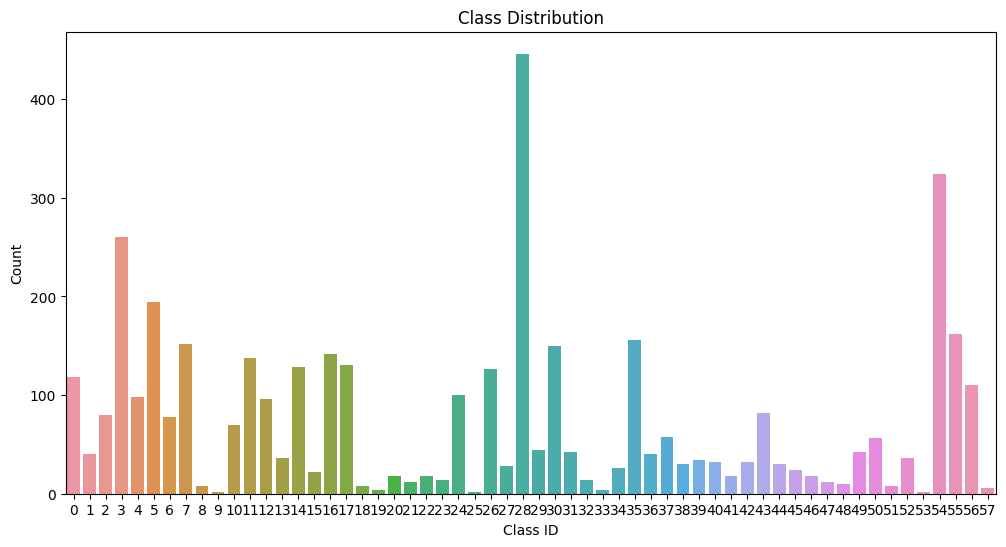

In [ ]:
import seaborn as sns
import pandas as pd

# Converting the preprocessed data to a DataFrame
df = pd.DataFrame(data)

# Displaingy basic information about the dataset
print("Dataset information:")

plt.figure(figsize=(12, 6))
sns.countplot(x="label", data=df)
plt.title("Class Distribution")
plt.xlabel("Class ID")
plt.ylabel("Count")
plt.show()

Here we are visualizing a set of sample images from the dataset. The script uses the numpy library for numerical operations and matplotlib for plotting. It randomly selects a specified number of samples (in this case, 10) from the DataFrame 'df.' For each selected sample, the 'image' column is converted into a NumPy array, and the resulting array is displayed as a grayscale image.

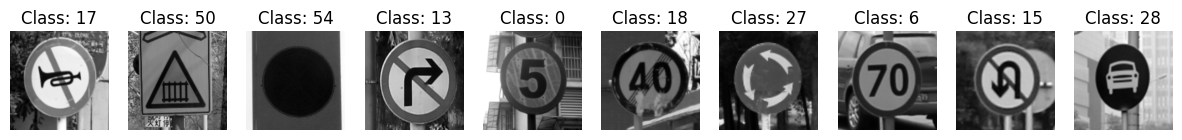

In [ ]:
import numpy as np
# Display sample images from the dataset
num_samples = 10
selected_samples = df.sample(num_samples)

plt.figure(figsize=(15, 8))
for i, sample in enumerate(selected_samples.itertuples(), 1):
    plt.subplot(1, num_samples, i)

    # Converting the 'image' column to a NumPy array
    img_array = np.array(sample.image)

    plt.imshow(img_array, cmap='gray')
    plt.title(f'Class: {sample.label}')
    plt.axis('off')

plt.show()

This code is visualizing the distribution of pixel intensities for a set of selected sample images from the dataset. The script utilizes matplotlib to create a histogram for each image, displaying the frequency of pixel intensities on the x-axis and the corresponding frequency on the y-axis. The images are presented in a single row, with each subplot representing a different sample.

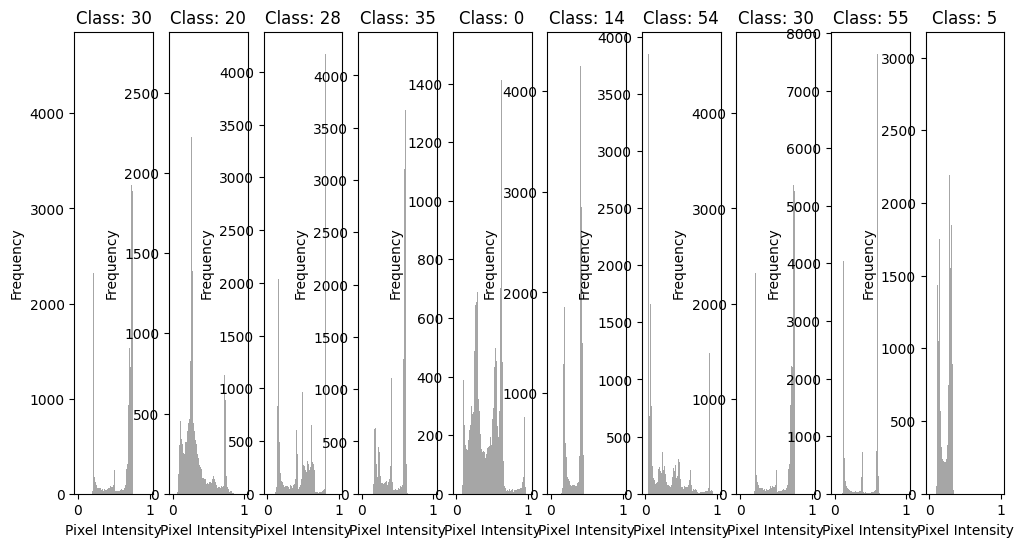

In [ ]:
# Visualizing pixel intensity distribution
plt.figure(figsize=(12, 6))
for i, sample in enumerate(selected_samples.itertuples(), 1):
    plt.subplot(1, num_samples, i)
    plt.hist(sample.image.flatten(), bins=256, range=[0, 1], color='gray', alpha=0.7)
    plt.title(f'Class: {sample.label}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
plt.show()

In this code snippet, we are extracting images from the given data and calculating three image quality metrics: brightness, contrast, and blurriness. The OpenCV library is utilized for image processing tasks. The calculate_image_quality function computes these metrics for each image based on their pixel values.

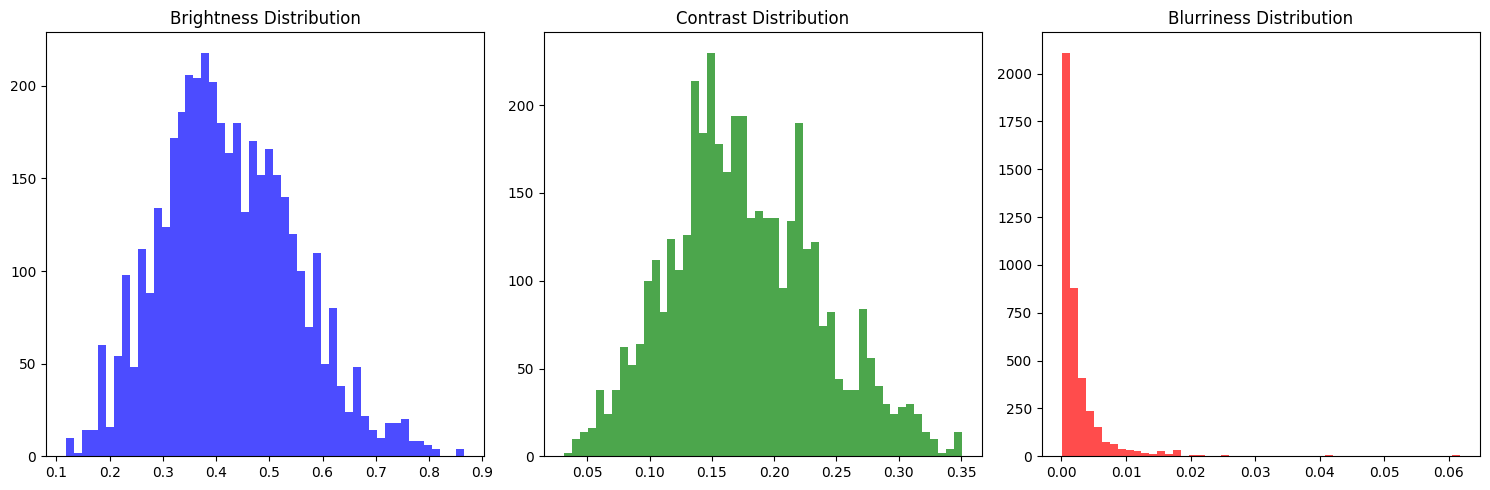

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Extract images from the data
images = [item['image'] for item in data]

# Function to calculate image quality metrics
def calculate_image_quality(image):
    # Average brightness
    brightness = np.mean(image)

    # Iimage contrast
    contrast = np.std(image)

    # Image blurriness (using Laplacian method)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    blurriness = np.var(laplacian)

    return brightness, contrast, blurriness

# Calculating image quality metrics for each image
quality_metrics = [calculate_image_quality(img) for img in images]

# Extracting individual metrics
brightness_values, contrast_values, blurriness_values = zip(*quality_metrics)

# Plotingt histograms for each quality metric
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(brightness_values, bins=50, color='blue', alpha=0.7)
plt.title('Brightness Distribution')

plt.subplot(1, 3, 2)
plt.hist(contrast_values, bins=50, color='green', alpha=0.7)
plt.title('Contrast Distribution')

plt.subplot(1, 3, 3)
plt.hist(blurriness_values, bins=50, color='red', alpha=0.7)
plt.title('Blurriness Distribution')

plt.tight_layout()
plt.show()


# **Feature Extraction and Feature Visualization**




The features have been extracted through 2 distinct methods and their results have been viusalized for comparison.

**1 - Feature Extraction by a CNN model**



In this code segment, we perform feature extraction using a Convolutional Neural Network (CNN) model. Following steps are included:

1. Data Preparation: We start by creating a DataFrame from the preprocessed data, containaing images and corresponding labels. The images are reshaped to match the input shape expected by the CNN.

2. CNN Model Definition: We define a simple CNN model using the Sequential API from Keras. The model consists of convolutional layers with activation functions, batch normalization, max-pooling layers, a flattening layer, and dense layers with dropout for regularization. This architecture is designed for image feature extraction.

3. Feature Extraction: The CNN model is then used to extract features from each preprocessed image in the dataset. The extracted features are stored in the features_cnn array.

4. Flattening Features: The extracted features are then flattened into a one-dimensional array so that it can be used for further analysis or modeling.

5. DataFrame Creation and Saving: We create a new DataFrame containing the flattened CNN features along with corresponding labels. This DataFrame is then saved to a CSV file for future use.

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


# Creating a DataFrame from the preprocessed data and separating features and labels
df_data = pd.DataFrame(data)

X = np.array(df_data['image'].tolist())
y = np.array(df_data['label'].tolist())

# Reshaping images to match the input shape expected by the CNN
X = X.reshape(-1, 224, 224, 1)

# Defining a simple CNN model for feature extraction - the final layer is not connected to any softmax layer
# hence the final output in this case are Features extracted
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))


features_cnn = model.predict(X)
features_flattened_cnn = features_cnn.reshape(features_cnn.shape[0], -1)


df_features_cnn = pd.DataFrame({'features_cnn': features_flattened_cnn.tolist(), 'label': y.tolist()})
df_features_cnn.to_csv('/content/drive/MyDrive/Traffic Sign Classification/extracted_features_cnn.csv', index=False)


131/131 [==============================] - 163s 1s/step


In [ ]:
print(features_flattened_cnn.shape)


(4170, 64)


In this part of the code, we are simplifying the information extracted by a CNN. The features extracted by the CNN are transformed using Principal Component Analysis (PCA) to reduce their complexity to just two main components. This reduction helps us create a visual representation, specifically a scatter plot, where each point represents an image. The position and color of each point in the plot provide insights into the patterns and relationships within the dataset. It's a way of summarizing complex information from the CNN in a more manageable and visual form.

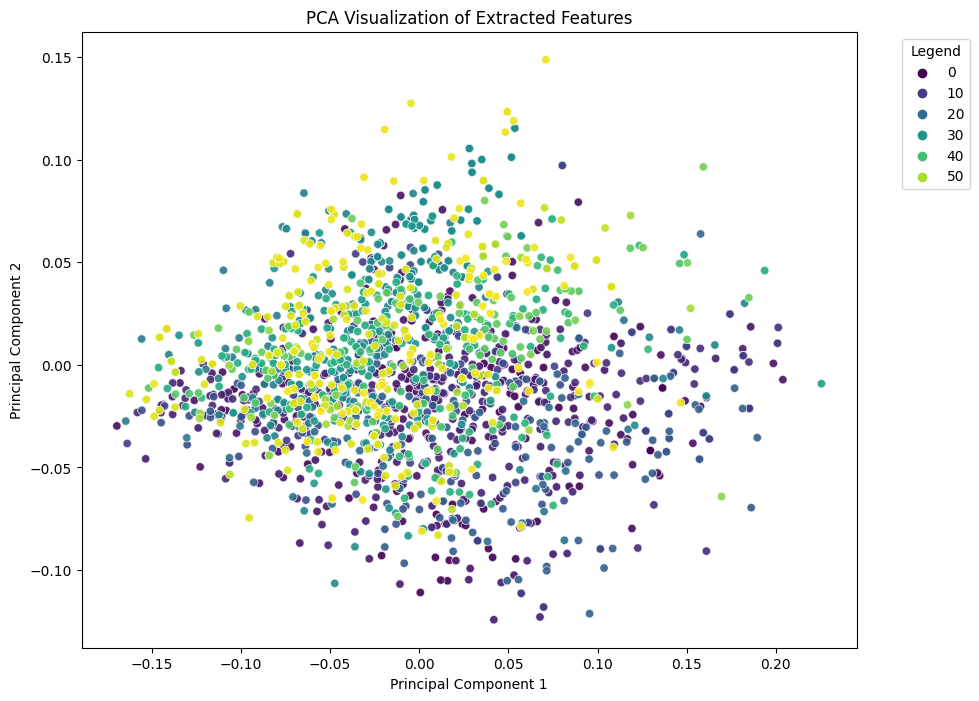

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Loading the extracted features extracted features
df_features_cnn = pd.read_csv('/content/drive/MyDrive/Traffic Sign Classification/extracted_features_cnn.csv')

# Converting string representations of lists to actual lists
df_features_cnn['features_cnn'] = df_features_cnn['features_cnn'].apply(eval)

# Separating features and labels
X = np.array(df_features_cnn['features_cnn'].tolist())
y = np.array(df_features_cnn['label'].tolist())

# Applyiing PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# DataFrame for the reduced features
df_pca = pd.DataFrame({'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1], 'label': y.tolist()})

# Visualizing the reduced features using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='label', palette='viridis', data=df_pca, alpha=0.7)
plt.title('PCA Visualization of Extracted Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**2 - Feature Extraction using EfficientNetB0**

In this code segment, we perform feature extraction using a EfficientNetB0 model. Following steps are included:

1. Data Organization: We begin by creating a DataFrame from our preprocessed images and labels, assuming that our data is a list of dictionaries with image and label keys.

2. Normalization and Channel Addition: Pixel values of the images are normalized to a range of 0 to 1 for consistency. Additionally, a color channel is added to grayscale images to ensure that they match the required input shape for EfficientNetB0.

3. EfficientNetB0 Model Initialization: An instance of the EfficientNetB0 model is created using Keras with pre-trained weights from ImageNet. It is a sophisticated convolutional neural network architecture designed for efficient and effective feature extraction.

4. Global Average Pooling (GAP) Layer Addition: A GAP layer is added to the model. This layer provides a more compact representation.

5. Feature Extraction: Features are extracted from each preprocessed image in the dataset using the EfficientNetB0 model with the added GAP layer.

6. DataFrame Creation and Saving: We organize the extracted features and corresponding labels into a new dataframe and the new dataframe is saved to a CSV file for future use.

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential


df_data = pd.DataFrame(data)

X = np.array(df_data['image'].tolist())
y = np.array(df_data['label'].tolist())

X = X / 255.0

# Add a color channel to the grayscale images as required by this particulsar model
X = np.expand_dims(X, axis=-1)

# Here the "include_top=False" indicates that the last layer is excluded which is used for classification, hence the end result is Features extracted
effnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# A Global Average Pooling (GAP) layer
effnet_model = Sequential([
    effnet_model,
    GlobalAveragePooling2D(),
])


features_effnet = effnet_model.predict(X)

df_features_effnet = pd.DataFrame({'features_effnet': features_effnet.tolist(), 'label': y.tolist()})

# Saving the EfficientNetB0 extracted features to a CSV file
df_features_effnet.to_csv('/content/drive/MyDrive/Traffic Sign Classification/extracted_features_effnet.csv', index=False)


131/131 [==============================] - 331s 2s/step


In [ ]:
print(df_features_effnet.shape)

(4170, 2)


In this part of code, we are simplifying and visualizing the information extracted by EfficientNetB0. The extracted features are loaded from a CSV file into a DataFrame. To prepare the features for analysis, we manually convert their string representation into actual lists of numbers. Using PCA, we then reduce the dimensionality of these features to only two main components, creating a new DataFrame. Then finally, we visualize the reduced features in a scatter plot. Each point on the plot represents an image, and the position and color of the points provide insights into the relationships and patterns within the dataset.

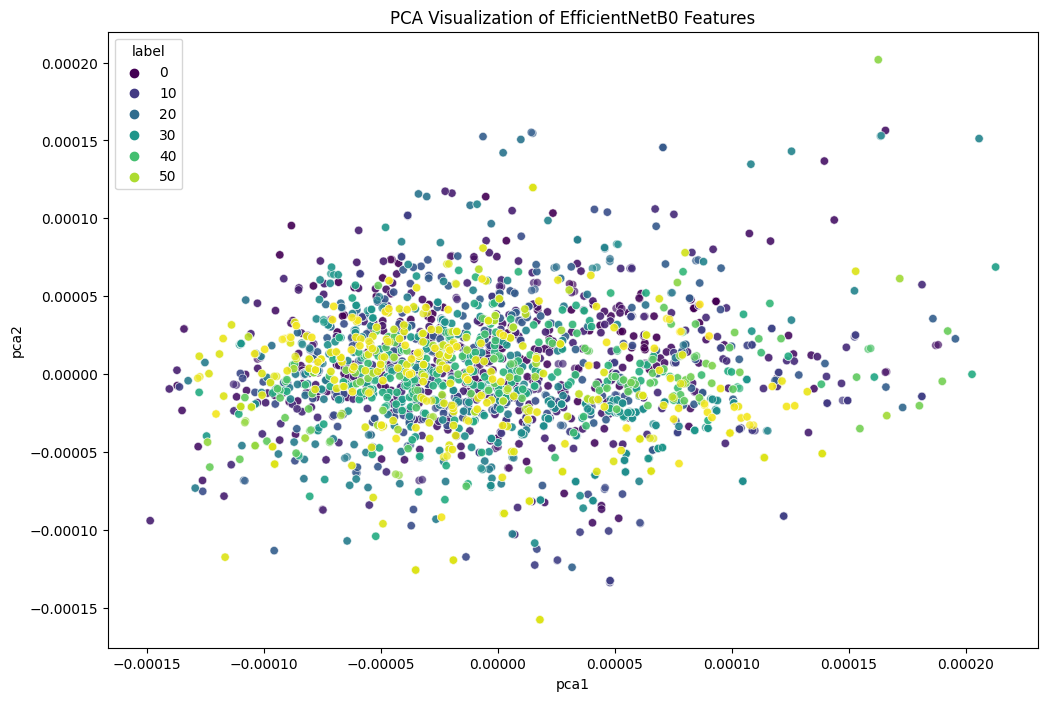

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


df_features = pd.read_csv('/content/drive/MyDrive/Traffic Sign Classification/extracted_features_effnet.csv')
df_features['features_effnet'] = df_features['features_effnet'].apply(lambda x: [float(val) for val in x.replace('...', '0.0').replace(',', '').strip('[]').split()])

features = np.array(df_features['features_effnet'].tolist())
labels = df_features['label']

# Applying PCA
pca = PCA(n_components=2, random_state=42)
features_pca = pca.fit_transform(features)

df_pca_effnet = pd.DataFrame({'pca1': features_pca[:, 0], 'pca2': features_pca[:, 1], 'label': labels})

plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca1', y='pca2', hue='label', data=df_pca_effnet, palette='viridis', alpha=0.7)
plt.title('PCA Visualization of EfficientNetB0 Features')
plt.show()


# **Model Selection**

Here we are preparing a neural network model for traffic sign classification using features extracted through convolutional neural networks (CNN). Here's a breakdown of the code:

**Data Preparation:**

The features and labels are loaded from a CSV file containing extracted CNN features.
String representations of lists in the 'features_cnn' column are converted to actual lists.

**Feature and Label Encoding**:

The features ('X') and labels ('y') are converted to NumPy arrays.
Labels are encoded using the LabelEncoder from scikit-learn.

**Dataset Splitting:**

The dataset is split into training and testing sets using the train_test_split function. 80% of the data is used for training, and 20% is reserved for testing.

**Neural Network Model:**

A Sequential model is defined for the neural network.
Three dense layers with ReLU activation functions (512, 256, and 128 neurons, respectively) are added for feature processing.
Batch normalization and dropout layers are included to enhance model performance and reduce overfitting.
The output layer uses the softmax activation function with the number of neurons equal to the number of unique classes in the dataset.

**Model Compilation:**

The model is compiled using the Adam optimizer and sparse categorical crossentropy loss, suitable for integer-encoded class labels.
Accuracy is chosen as the evaluation metric.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import LabelEncoder

df_features_cnn = pd.read_csv('/content/drive/MyDrive/Traffic Sign Classification/extracted_features_cnn.csv')

# Converting string representations of lists to actual lists
df_features_cnn['features_cnn'] = df_features_cnn['features_cnn'].apply(eval)


X = np.array(df_features_cnn['features_cnn'].tolist())
y = np.array(df_features_cnn['label'].tolist())

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Defining a neural network model for your extracted features
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# **Training and Testing**

This code provides a comprehensive evaluation of the trained model's performance, offering insights into its accuracy, precision, recall, and F1 score. These metrics collectively assess the model's ability to make accurate predictions across different aspects of classification. Adjustments to the model architecture or training parameters can be made based on the observed performance metrics. Additionally, the save_model function from Keras is used to save the trained model for future use.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import save_model

# Training the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1)

# Evaluating the model on the test set
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=1)

# Calculation of evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Total Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Epoch 1/20
47/47 [==============================] - 1s 11ms/step - loss: 1.0462 - accuracy: 0.6885 - val_loss: 1.0681 - val_accuracy: 0.7036
Epoch 2/20
47/47 [==============================] - 0s 9ms/step - loss: 0.9915 - accuracy: 0.6975 - val_loss: 1.1113 - val_accuracy: 0.6976
Epoch 3/20
47/47 [==============================] - 0s 9ms/step - loss: 0.9554 - accuracy: 0.7165 - val_loss: 1.0094 - val_accuracy: 0.7485
Epoch 4/20
47/47 [==============================] - 0s 9ms/step - loss: 0.9658 - accuracy: 0.7099 - val_loss: 1.0202 - val_accuracy: 0.7186
Epoch 5/20
47/47 [==============================] - 0s 9ms/step - loss: 0.9345 - accuracy: 0.7169 - val_loss: 0.9469 - val_accuracy: 0.7365
Epoch 6/20
47/47 [==============================] - 0s 9ms/step - loss: 0.8779 - accuracy: 0.7325 - val_loss: 0.8946 - val_accuracy: 0.7725
Epoch 7/20
47/47 [==============================] - 1s 11ms/step - loss: 0.9146 - accuracy: 0.7165 - val_loss: 0.8970 - val_accuracy: 0.7515
Epoch 8/20
47/47 [

In [ ]:
# Save the model
save_model(model, '/content/drive/MyDrive/Traffic Sign Classification/extracted_features_model.h5')

<ipython-input-7-01e31ea2380d>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, '/content/drive/MyDrive/Traffic Sign Classification/extracted_features_model.h5')


**Visualizing the Evaluation Metrics**

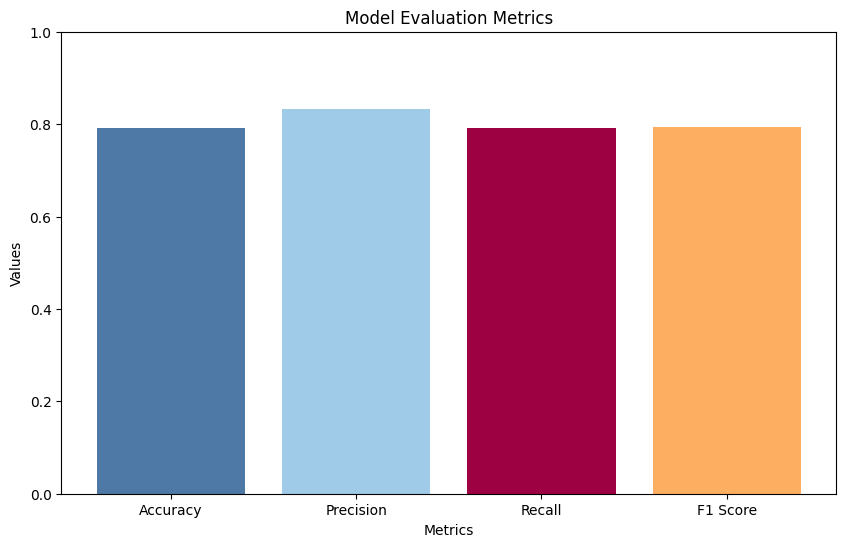

In [ ]:
import matplotlib.pyplot as plt

# Evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['#4e79a7', '#a0cbe8', '#9e0142', '#fdae61'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)  #
plt.show()

**The 'Great' Confusion Matrix**

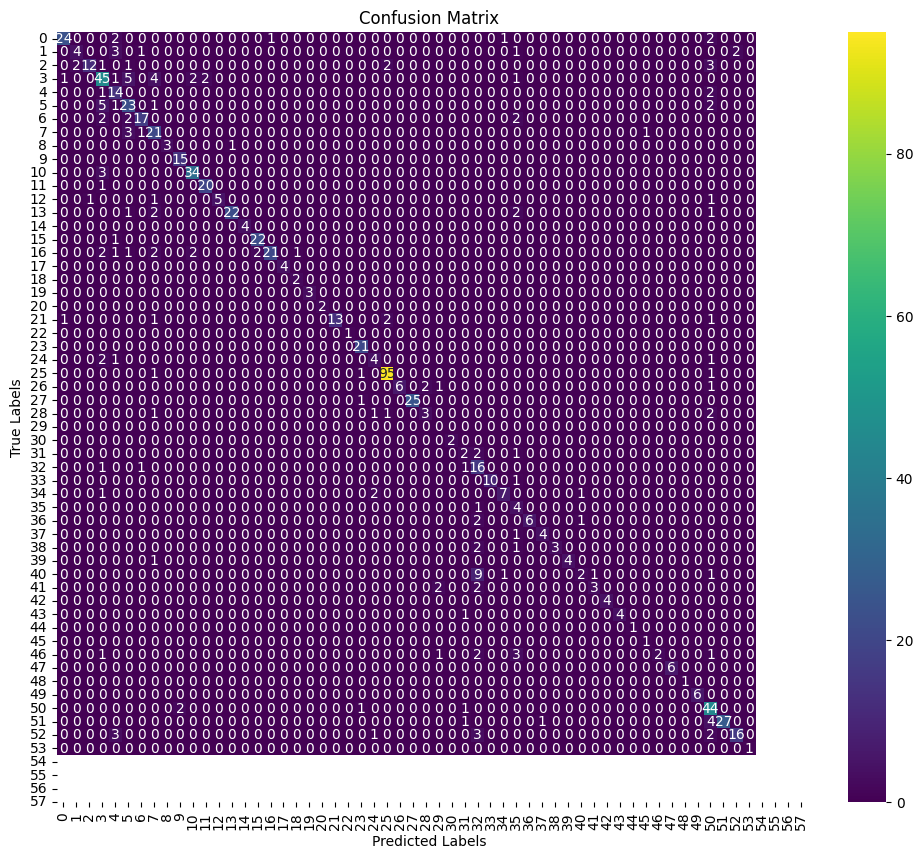

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Defining class labels
class_labels = label_encoder.classes_

# Plotting the confusion matrix as a colorful heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


This code snippet focuses on visualizing the weights of the first dense layer in a pre-trained neural network model for traffic sign classification, providing insights into the features that the model has learned.

Shape of weights: (64, 512)


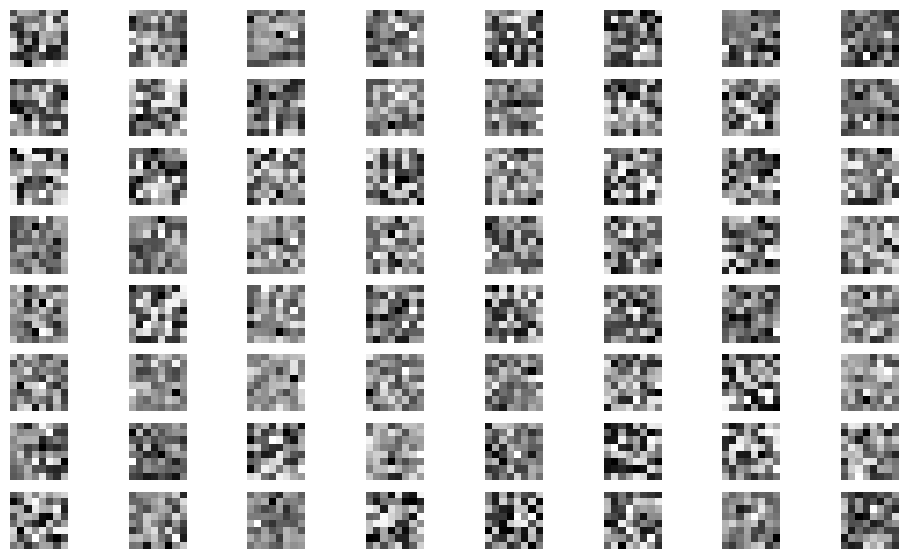

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Loadinng the saved model
model = load_model('/content/drive/MyDrive/Traffic Sign Classification/extracted_features_model.h5')

# Get the weights of the first dense layer
first_dense_layer = model.layers[0]
weights = first_dense_layer.get_weights()[0]

# Print the shape of the weights
print("Shape of weights:", weights.shape)

# Visualizing the weights if the shape is as expected
if len(weights.shape) == 2:
    # Visualize the weights
    fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(12, 7))

    for i, ax in enumerate(axes.flatten()):
        weight_image = weights[:, i].reshape(8, 8)
        ax.imshow(weight_image, cmap='gray')
        ax.axis('off')

    plt.show()
else:
    print("Weights array does not have the expected shape.")


# **Conclusion**


**Lessons Learned**

1. Feature extraction through CNNs is a powerful technique for capturing hierarchical features from images.

2. Proper data preprocessing, including image resizing and normalization, plays a crucial role in model performance.

3. Neural network architectures, when appropriately designed, can effectively learn complex patterns from image data.

4. Forward learning strategies can enhance the model's ability to adapt to changing data distributions, ensuring sustained relevance in dynamic environments.

**Areas for Further Exploration**

**Hyperparameter tuning:** Experimenting with different neural network architectures, optimizers, and learning rates can further optimize performance.

**Data augmentation:** Introducing augmented images during training could enhance the model's ability to generalize to unseen data.

**Interpretability:** Exploring techniques for interpreting and visualizing neural network decisions can enhance model transparency.

**In conclusion**, This project marks a significant step forward in traffic sign classification, and future endeavors could focus on refining the model, exploring additional features, and advancing interpretability for real-world deployment and enhanced performance.

### And we learned a lot! 😄